In [29]:
import zipfile
import pandas as pd
import os
 

# Step 1: Unzip  file
zip_file_path = 'A:/jupyter_notebook/datasets/archive.zip'
output_dir = 'A:/jupyter_notebook/titanic/titanic_dataset/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# Step 2: Load the dataset 
titanic_data_path = os.path.join(output_dir, 'train.csv')

# Load the Titanic dataset
df = pd.read_csv(titanic_data_path)

# Step 3: Inspect the data
print("Data Overview:")
print(df.info())  # Data structure and types
print(df.describe())  # Summary statistics
print(df.head())  # Preview the first few rows

 

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.35

Missing Data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


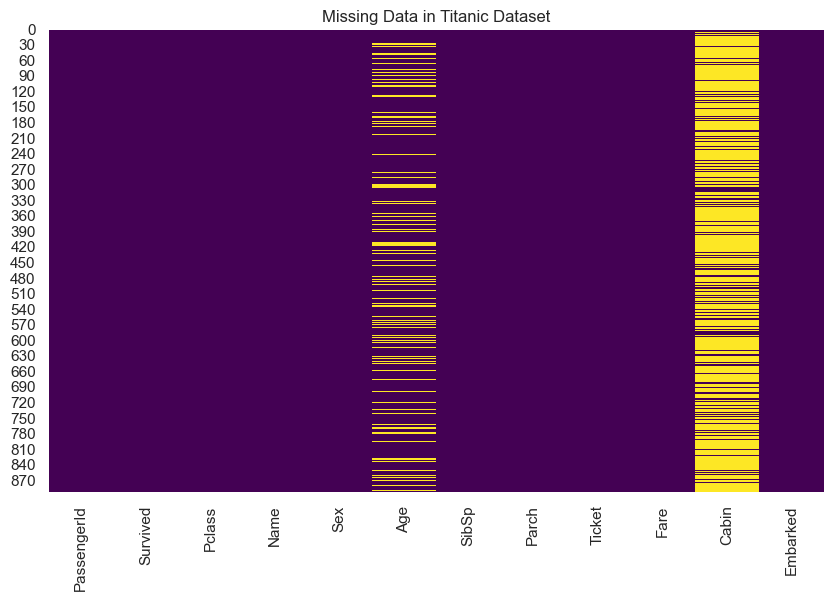

In [30]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data in Titanic Dataset')
plt.show()


In [31]:
# Fill missing Age values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with the mode (most frequent)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Feature Engineering: Family Size and IsAlone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Convert categorical variables to numeric: Sex and Embarked
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Check the updated dataframe
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  FamilySize  IsAlone  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500           2        0       False        True  
1          PC 17599  71.2833           2        0       False       False  
2  STON/O2. 3101282   7.9250           1        1       False       

Survival Rate by Gender:
 Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Survival Rate by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


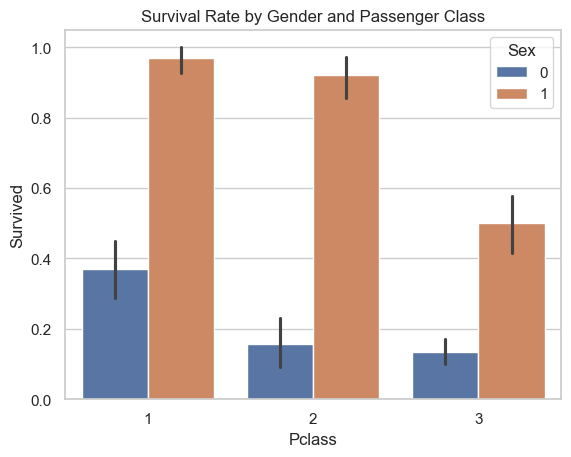

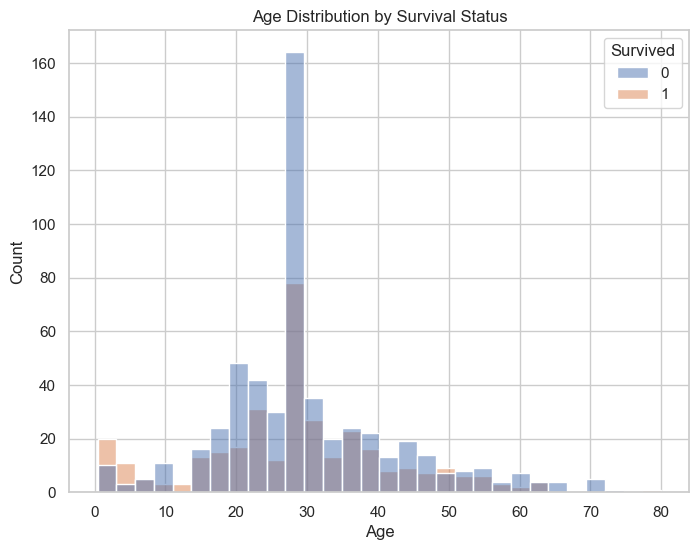

In [32]:
# Survival rate by Gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:\n", survival_by_gender)

# Survival rate by Passenger Class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Class:\n", survival_by_class)

# Plot survival rate by Gender and Class
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

# Plot Age distribution by Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, kde=False, hue='Survived')
plt.title('Age Distribution by Survival Status')
plt.show()



   SibSp  Parch  FamilySize  IsAlone
0      1      0           2        0
1      1      0           2        0
2      0      0           1        1
3      1      0           2        0
4      0      0           1        1


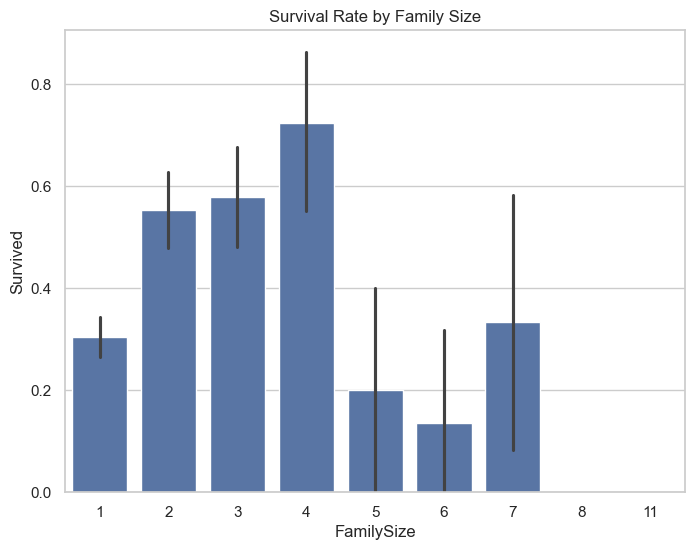

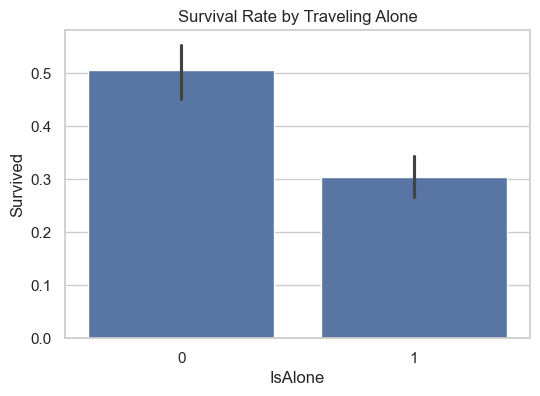

In [33]:
# Create a new feature for FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new feature to indicate if the passenger was alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Inspect the dataset to confirm the new features are added
print(df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())

# Analyze survival rate by FamilySize and IsAlone
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by Family Size
plt.figure(figsize=(8, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()

# Plot survival rate for those who were alone vs. not alone
plt.figure(figsize=(6, 4))
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title("Survival Rate by Traveling Alone")
plt.show()


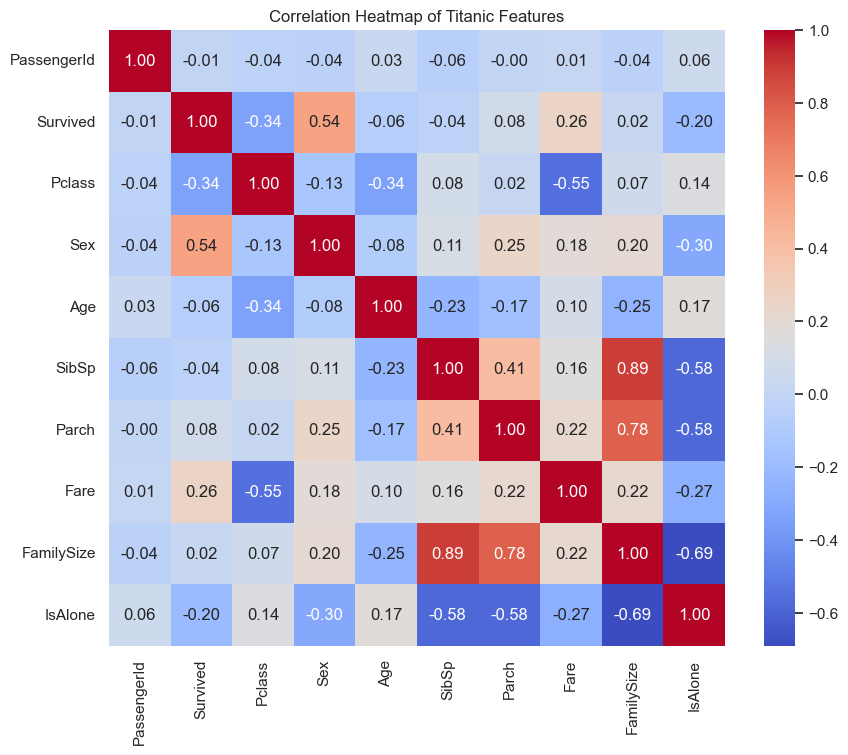

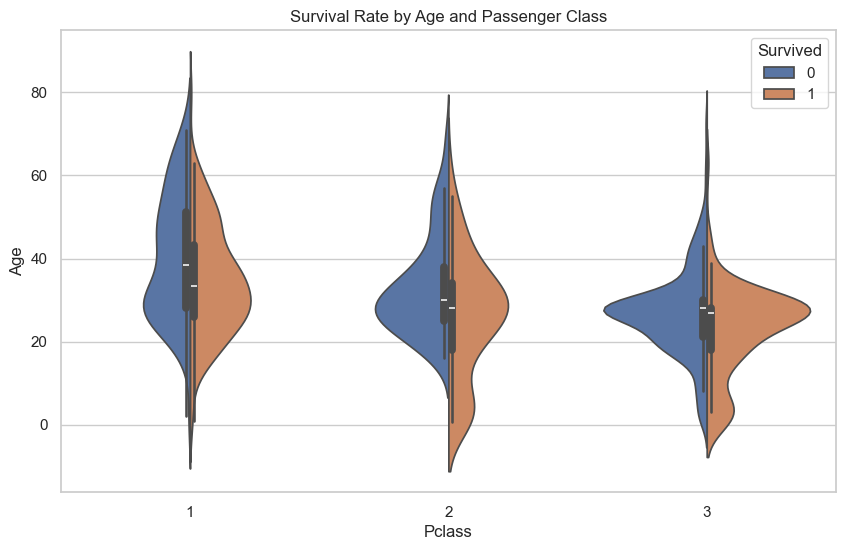

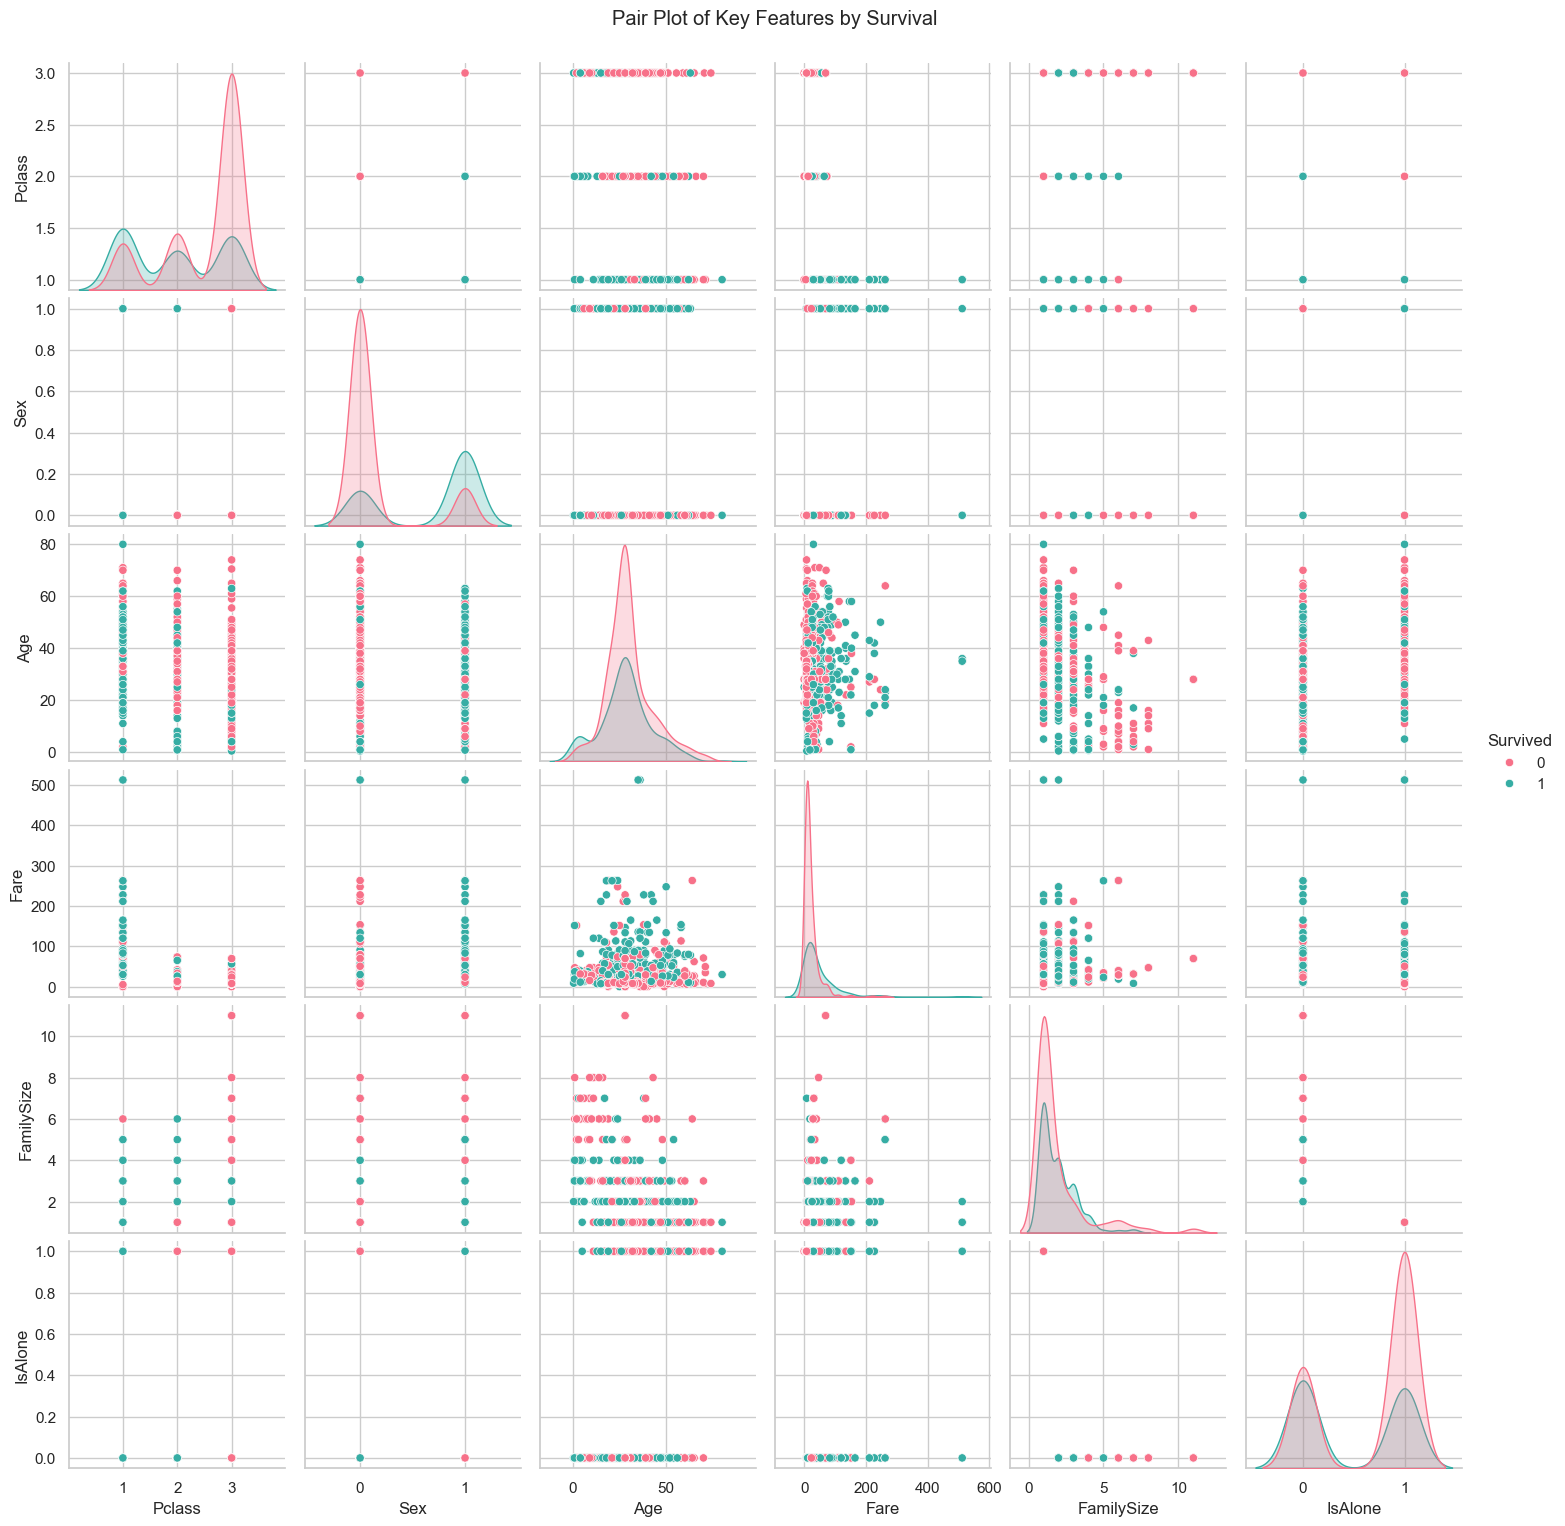

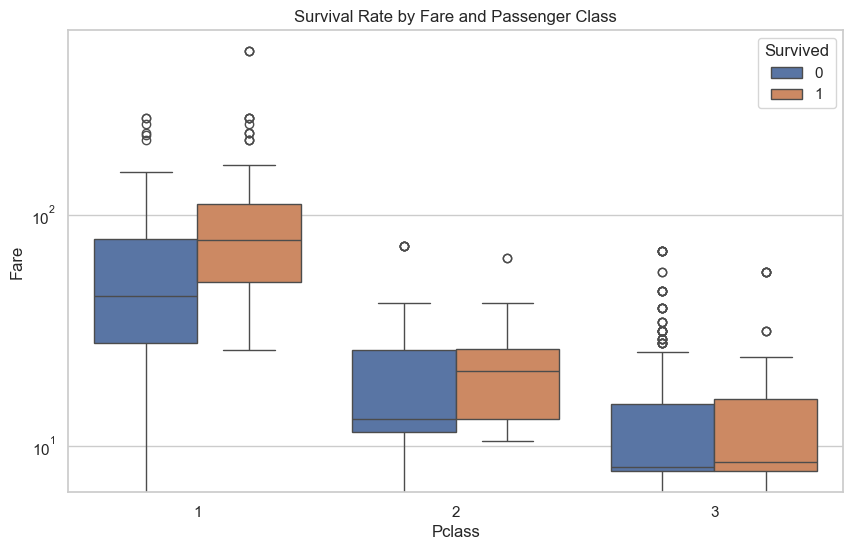

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set general plot style
sns.set(style="whitegrid")

# 1. Correlation Heatmap (only numeric columns)
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Heatmap of Titanic Features")
plt.show()


# 2. Survival Rate by Age and Passenger Class
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title("Survival Rate by Age and Passenger Class")
plt.show()

# 3. Pair Plot for Key Features
# Select a few key features for visualization
features = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone']
sns.pairplot(df[features], hue='Survived', diag_kind='kde', palette="husl")
plt.suptitle("Pair Plot of Key Features by Survival", y=1.02)
plt.show()

# 4. Survival Rate by Fare and Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.yscale('log')  # Scale to log to handle fare outliers
plt.title("Survival Rate by Fare and Passenger Class")
plt.show()
